## DATA ANALYSIS
01.03.2022

In [2]:
import s3fs; import xarray as xr; import numpy as np
import pandas as pd; import scipy
import matplotlib.pyplot as plt; import cartopy.crs as ccrs
import netCDF4 as nc; import datetime as dt
import ocetrac

import dask.array as da
import warnings; import expectexception
warnings.filterwarnings('ignore')
import intake; import pprint

### Ensemble Mean
- North Pacific Ocean

In [3]:
lat_lim_less = 30.
lat_lim_great = 60.

lon_lim_less = 200.
lon_lim_great = 250.

In [4]:
ensemble_mean = xr.open_dataset('/glade/work/cassiacai/ensemble_mean.nc')

ensemble_mean_new = ensemble_mean.where((ensemble_mean.lat >= lat_lim_less) & (ensemble_mean.lat <= lat_lim_great) 
                        &(ensemble_mean.lon >= lon_lim_less) & (ensemble_mean.lon <= lon_lim_great),drop=True)
ensemble_mean_new.SST.shape

(1980, 32, 41)

In [5]:
ensemble_mean_new_nans = ensemble_mean_new.where(ensemble_mean_new != 0)

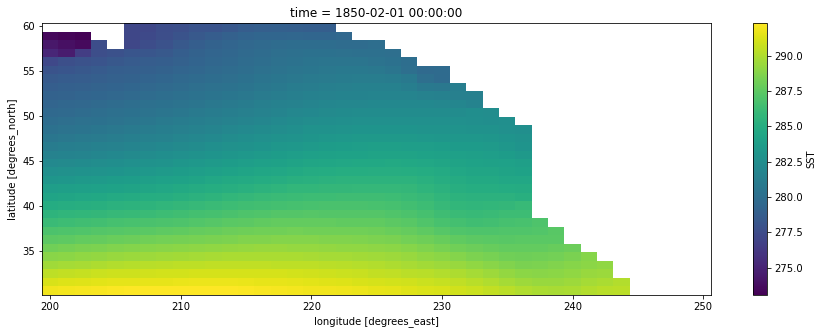

In [16]:
plt.rcParams["figure.figsize"] = (15,5)

i = 0
# plt.pcolormesh(ensemble_mean_new_nans.SST[i,:,:])
ensemble_mean_new_nans.SST[i,:,:].plot()

In [7]:
ensemble_mean_new_nans.time

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 2, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 4, 1, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2014, 11, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [8]:
ensemble_mean_SST = []; ensemble_max_SST = []; ensemble_min_SST = []; time_scale = []; time_month = []
for i in range(0,1980,12):
    time_scale.append(i)
    time_month.append(ensemble_mean_new_nans.time[i])
    timed_SST = ensemble_mean_new_nans.SST[i,:,:]
    mean = np.nanmean(timed_SST); ensemble_mean_SST.append(mean)
    maximum = np.nanmax(timed_SST); ensemble_max_SST.append(maximum)
    minimum = np.nanmin(timed_SST); ensemble_min_SST.append(minimum)

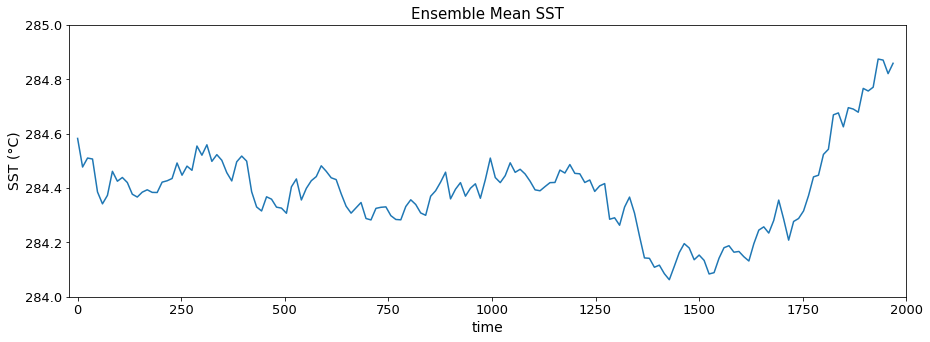

In [9]:
plt.rcParams["figure.figsize"] = (15,5)

plt.title('Ensemble Mean SST',fontsize=15)
plt.plot(time_scale, ensemble_mean_SST)
plt.xlim(-20,2000); plt.ylim(284,285)
plt.xlabel('time',fontsize=14); plt.ylabel('SST (°C)',fontsize=14)
plt.xticks(fontsize=13, rotation=0); plt.yticks(fontsize=13, rotation=0)
plt.show()

### SST Ensemble Members

In [10]:
SST_full = xr.open_dataset('SST_first10.nc')
first_10_members_SST = SST_full.isel(member_id = [0,1,2,3,4,5,6,7,8,9])
first_10_members_SST

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, time: 1980, member_id: 10)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
  * member_id  (member_id) object 'r10i1181p1f1' ... 'r11i1301p1f2'
Data variables:
    SST        (member_id, time, lat, lon) float32 ...

In [11]:
first_10_members_SST_new = first_10_members_SST.where((first_10_members_SST.lat >= lat_lim_less) & (first_10_members_SST.lat <= lat_lim_great) 
                        &(first_10_members_SST.lon >= lon_lim_less) & (first_10_members_SST.lon <= lon_lim_great),drop=True)

In [12]:
first_10_members_SST_new_nans = first_10_members_SST_new.SST.where(first_10_members_SST_new.SST != 0)

1968


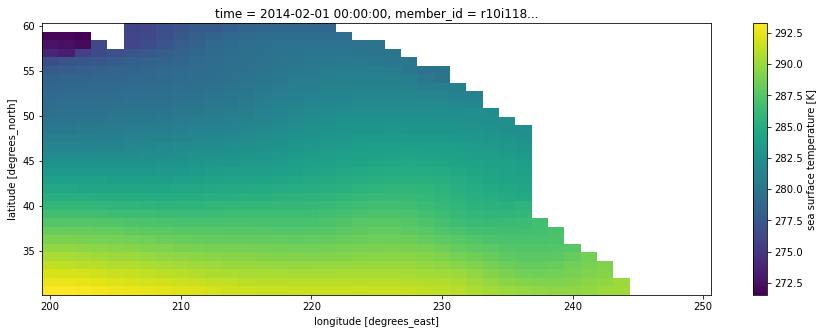

In [15]:
first_10_members_SST_new_nans[0,i,:,:].plot()
print(i)

In [17]:
first_10_members_SST_new = first_10_members_SST_new_nans

In [18]:
full_mean_SST = []; full_max_SST = []; full_min_SST = []; full_time_scale_SST = []

for j in range(0,10):
    mean_SST = []; max_SST = []; min_SST = []; time_scale_SST = []
    for i in range(0,1980,12): 
        time_scale_SST.append(i)
        timed_SST = first_10_members_SST_new[j, i, :, :]
        mean = np.nanmean(timed_SST); mean_SST.append(mean)
        maximum = np.nanmax(timed_SST); max_SST.append(maximum)
        minimum = np.nanmin(timed_SST); min_SST.append(minimum)
    full_mean_SST.append(mean_SST)
    full_max_SST.append(max_SST)
    full_min_SST.append(min_SST)
    full_time_scale_SST.append(time_scale_SST)

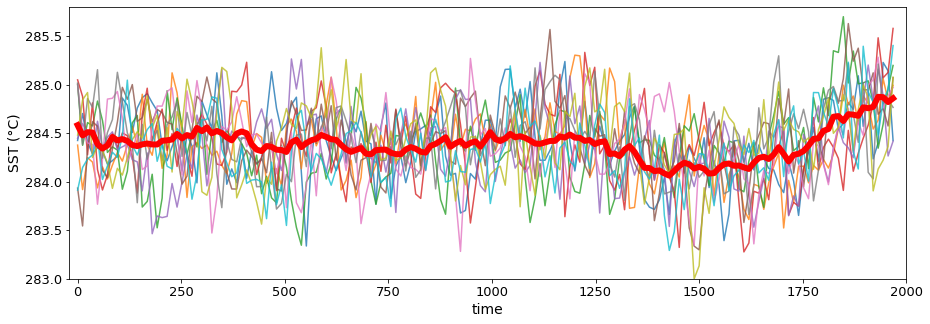

In [19]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(full_time_scale_SST[0], full_mean_SST[0],alpha=0.8)
plt.plot(full_time_scale_SST[1], full_mean_SST[1],alpha=0.8)
plt.plot(full_time_scale_SST[2], full_mean_SST[2],alpha=0.8)
plt.plot(full_time_scale_SST[3], full_mean_SST[3],alpha=0.8)
plt.plot(full_time_scale_SST[4], full_mean_SST[4],alpha=0.8)
plt.plot(full_time_scale_SST[5], full_mean_SST[5],alpha=0.8)
plt.plot(full_time_scale_SST[6], full_mean_SST[6],alpha=0.8)
plt.plot(full_time_scale_SST[7], full_mean_SST[7],alpha=0.8)
plt.plot(full_time_scale_SST[8], full_mean_SST[8],alpha=0.8)
plt.plot(full_time_scale_SST[9], full_mean_SST[9],alpha=0.8)

plt.plot(time_scale, ensemble_mean_SST,linewidth=6,color='red')

plt.xlim(-20,2000); plt.ylim(283,285.8)
plt.xlabel('time',fontsize=14); plt.ylabel('SST (°C)',fontsize=14)
plt.xticks(fontsize=13, rotation=0); plt.yticks(fontsize=13, rotation=0)
plt.show()

### SSTA Ensemble Members

In [20]:
SSTA_full = xr.open_dataset('/glade/work/cassiacai/SSTA_full.nc')
first_10_members_SSTA = SSTA_full.isel(member_id = [0,1,2,3,4,5,6,7,8,9])
first_10_members_SSTA

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, time: 1980, member_id: 10)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
  * member_id  (member_id) object 'r10i1181p1f1' ... 'r14i1251p1f2'
Data variables:
    SST        (member_id, time, lat, lon) float32 ...

In [21]:
first_10_members_SSTA_new = first_10_members_SSTA.where((first_10_members_SSTA.lat >= lat_lim_less) & (first_10_members_SSTA.lat <= lat_lim_great) 
                        &(first_10_members_SSTA.lon >= lon_lim_less) & (first_10_members_SSTA.lon <= lon_lim_great),drop=True)

In [22]:
first_10_members_SSTA_new

<xarray.Dataset>
Dimensions:    (member_id: 10, time: 1980, lat: 32, lon: 41)
Coordinates:
  * lat        (lat) float64 30.63 31.57 32.51 33.46 ... 57.02 57.96 58.9 59.84
  * lon        (lon) float64 200.0 201.2 202.5 203.8 ... 246.2 247.5 248.8 250.0
  * time       (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
  * member_id  (member_id) object 'r10i1181p1f1' ... 'r14i1251p1f2'
Data variables:
    SST        (member_id, time, lat, lon) float32 -0.5668 -0.6222 ... 0.0 0.0

0


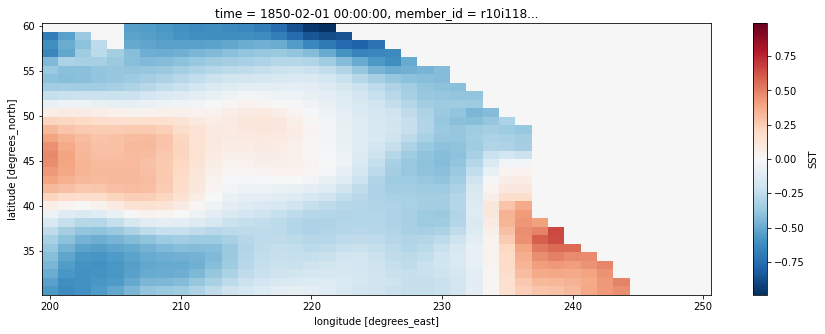

In [23]:
i = 0
first_10_members_SSTA_new.SST[0,0,:,:].plot()
print(i)

In [24]:
full_mean_SSTA = []; full_max_SSTA = []; full_min_SSTA = []; full_time_scale_SSTA = []

for j in range(0,10):
    mean_SSTA = []; max_SSTA = []; min_SSTA = []; time_scale_SSTA = []
    for i in range(0,1980,12): 
        time_scale_SSTA.append(i)
        timed_SSTA = first_10_members_SSTA_new.SST[j, i, :, :]
        mean = np.nanmean(timed_SSTA); mean_SSTA.append(mean)
        maximum = np.nanmax(timed_SSTA); max_SSTA.append(maximum)
        minimum = np.nanmin(timed_SSTA); min_SSTA.append(minimum)
    full_mean_SSTA.append(mean_SSTA)
    full_max_SSTA.append(max_SSTA)
    full_min_SSTA.append(min_SSTA)
    full_time_scale_SSTA.append(time_scale_SSTA)

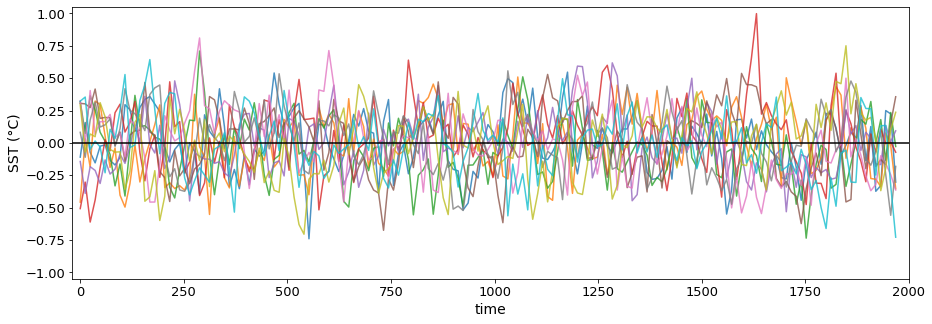

In [25]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(full_time_scale_SSTA[0], full_mean_SSTA[0],alpha=0.8)
plt.plot(full_time_scale_SSTA[1], full_mean_SSTA[1],alpha=0.8)
plt.plot(full_time_scale_SSTA[2], full_mean_SSTA[2],alpha=0.8)
plt.plot(full_time_scale_SSTA[3], full_mean_SSTA[3],alpha=0.8)
plt.plot(full_time_scale_SSTA[4], full_mean_SSTA[4],alpha=0.8)
plt.plot(full_time_scale_SSTA[5], full_mean_SSTA[5],alpha=0.8)
plt.plot(full_time_scale_SSTA[6], full_mean_SSTA[6],alpha=0.8)
plt.plot(full_time_scale_SSTA[7], full_mean_SSTA[7],alpha=0.8)
plt.plot(full_time_scale_SSTA[8], full_mean_SSTA[8],alpha=0.8)
plt.plot(full_time_scale_SSTA[9], full_mean_SSTA[9],alpha=0.8)

plt.xlim(-20,2000); plt.ylim(-1.05,1.05)
plt.axhline(y=0, color='k')
plt.xlabel('time',fontsize=14); plt.ylabel('SST (°C)',fontsize=14)
plt.xticks(fontsize=13, rotation=0); plt.yticks(fontsize=13, rotation=0)
plt.show()

### Ocetrac Output

In [26]:
%%time

all_blob_files = []
all_combined_files = []
all_combined_NEP_files = [] 
all_events_NEP = []

for i in range(0,10):
    blobs_ens_num = 'blobs_ens_{}_rad4.nc'.format(i)
    new_blob_file_open = xr.open_dataset(str(blobs_ens_num))
    all_blob_files.append(new_blob_file_open)
    
    combined = xr.combine_by_coords([first_10_members_SSTA.isel(member_id = i),new_blob_file_open])
    all_combined_files.append(combined)
    
    combined_NEP = combined.where((combined.lat >= lat_lim_less) & (combined.lat <= lat_lim_great)&(combined.lon >= lon_lim_less) & (combined.lon <= lon_lim_great),drop=True)
    all_combined_NEP_files.append(combined_NEP)
    
    event_NEP = combined_NEP.groupby(combined_NEP.labels)
    all_events_NEP.append(event_NEP)

CPU times: user 5.15 s, sys: 1.45 s, total: 6.6 s
Wall time: 14.4 s


In [127]:
%% time
full_dfs = []; full_xarrays = []

for i in range(len(all_events_NEP)):
    file = all_events_NEP[i]

    label_ls = []; time_begin_ls = []; time_end_ls = []; duration_ls = []; 
    intense_mean = []; intense_max = []; intense_min = [];intense_cumu = []
    coords_ls = []; cell_area_ls = []

    for l, ent in file:
        label_ls.append(l)
        groupedby_by_time = ent.groupby(ent.time)
        time_begin = ent.time[0].values; time_begin_ls.append(time_begin)
        time_end = ent.time[-1].values; time_end_ls.append(time_end)
        duration = len(ent.groupby("time")); duration_ls.append(duration)

        temp_intense_mean = []; temp_intense_max = []; temp_intense_min = []; temp_intense_cumu = []
        temp_coords = []; temp_cell_area = []
        for n, gro in groupedby_by_time:
            lat = gro.lat.values
            lon = gro.lon.values
            time = gro.time.values

            intensity_mean_val = gro['SST'].values.mean(); temp_intense_mean.append(intensity_mean_val)
            intensity_max_val = gro['SST'].values.max(); temp_intense_max.append(intensity_max_val)
            intensity_min_val = gro['SST'].values.min(); temp_intense_min.append(temp_intense_min)
            intensity_cumulative_val = gro['SST'].values.sum(); temp_intense_cumu.append(intensity_cumulative_val)

            coords = list(zip(lat, lon)); temp_coords.append(coords)
            y,x=zip(*coords)
            dlon = [np.cos(y[c]*np.pi/180)*(111.320*1) for c in np.arange(0, len(coords))]
            dlat = (110.574 *1) * np.ones(len(dlon))
            cell_area = [np.sum(dlon[c]*dlat[c]) for c in np.arange(0, len(coords))]; temp_cell_area.append(cell_area)

        intense_mean.append(temp_intense_mean)
        intense_max.append(temp_intense_max)
        intense_min.append(temp_intense_min) 
        intense_cumu.append(temp_intense_cumu)
        coords_ls.append(temp_coords)
        cell_area_ls.append(temp_cell_area)
    my_df = pd.DataFrame(zip(label_ls, time_begin_ls, time_end_ls, duration_ls,
                            intense_mean, intense_max, intense_min, intense_cumu,
                            coords_ls, cell_area_ls), columns = ['label', 'time_begin', 'time_end', 'duration',
                                                              'intense_mean', 'intense_max', 'intense_min','intense_cumu',
                                                              'coords','cell_area'])
    my_xarray = my_df.to_xarray() 
    
    full_dfs.append(my_df)
    full_xarrays.append(my_xarray)

In [130]:
full_xarrays[0]

<xarray.Dataset>
Dimensions:       (index: 200)
Coordinates:
  * index         (index) int64 0 1 2 3 4 5 6 7 ... 193 194 195 196 197 198 199
Data variables:
    label         (index) float64 68.0 148.0 160.0 ... 4.59e+03 4.616e+03
    time_begin    (index) object 1851-12-01 00:00:00 ... 2006-03-01 00:00:00
    time_end      (index) object 1854-06-01 00:00:00 ... 2013-03-01 00:00:00
    duration      (index) int64 28 2 7 2 4 2 6 1 3 2 1 ... 1 1 1 25 3 1 1 2 1 33
    intense_mean  (index) object [1.3412186, 1.1474661, 1.3287985, 1.6017257,...
    intense_max   (index) object [1.6270447, 1.2498169, 1.6156311, 2.1660156,...
    intense_min   (index) object [[...], [...], [...], [...], [...], [...], [...
    intense_cumu  (index) object [81.81433, 13.769592, 74.41272, 110.51907, 2...
    coords        (index) object [[(30.6282722513089, 200.0), (30.62827225130...
    cell_area     (index) object [[10591.864557327535, 10591.864557327535, 10...

#### TO DO: 
---------------------------------------------------------------
 - Mindmap of what information I want to learn from this data
 - What would some of the figures look like?
 - Fix useOcetrac.ipynb